In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
dust_log = pd.read_csv('dustLog.csv')
dust_log.shape

FileNotFoundError: [Errno 2] No such file or directory: 'dustLog.csv'

In [ ]:
dust_log.head()

,edit_time,A01_value,A01_status,A01_run,A01_rel
0,2024-01-27 9:30,0.0,0,0,3
1,2024-01-27 10:00,0.0,0,0,3
2,2024-01-27 10:30,0.0,0,0,3
3,2024-01-27 11:00,0.0,0,0,3
4,2024-01-27 11:30,0.0,0,0,3


In [ ]:
def preprocess_data(dust_log):
    # 날짜 파싱 및 데이터 타입 변환
    dust_log['edit_time'] = pd.to_datetime(dust_log['edit_time'], dayfirst=True)
    dust_log['A01_value'] = pd.to_numeric(dust_log['A01_value'], errors='coerce')

    # 결측치 처리
    return dust_log.dropna(subset=['edit_time', 'A01_value'])

In [ ]:
processed_data = preprocess_data(dust_log)

<ipython-input-25-cceb1ac31631>:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dust_log['edit_time'] = pd.to_datetime(dust_log['edit_time'], dayfirst=True)


In [ ]:
processed_data['time_in_seconds'] = (processed_data['edit_time'] - processed_data['edit_time'].min()).dt.total_seconds()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X = processed_data[['time_in_seconds']]
y = processed_data['A01_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 다항식 특성을 생성 (2차 다항식 사용)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 다항 회귀 모델 생성 및 학습
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측
y_pred_poly = model_poly.predict(X_test_poly)

# 모델 평가
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error with Polynomial Regression: {mse_poly}")

Mean Squared Error with Polynomial Regression: 2.3674684737225067


In [ ]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.36385064985633


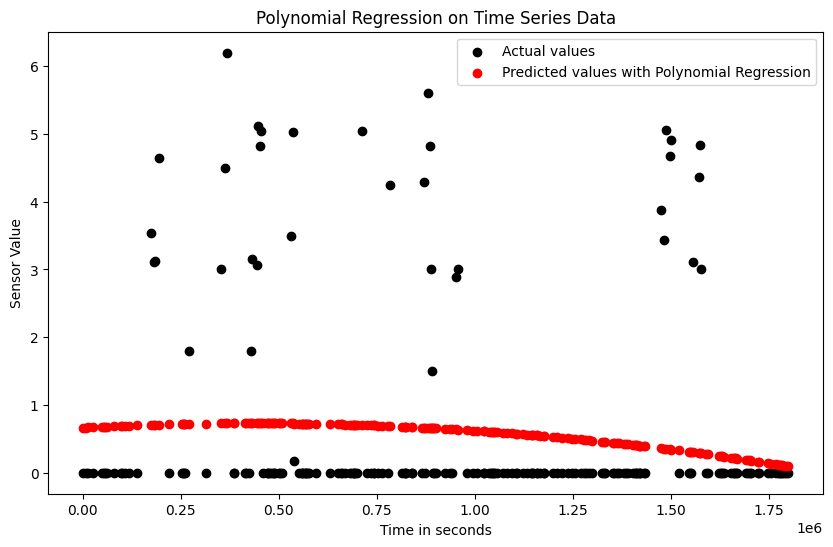

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted values with Polynomial Regression')
plt.xlabel('Time in seconds')
plt.ylabel('Sensor Value')
plt.title('Polynomial Regression on Time Series Data')
plt.legend()
plt.show()

In [ ]:
def analyze_and_visualize_data(processed_data):
    plt.figure(figsize=(12, 8))
    plt.plot(processed_data['edit_time'], processed_data['A01_value'], label='Sensor Value')
    plt.title('Time Series of Sensor Values')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    print(processed_data.describe())

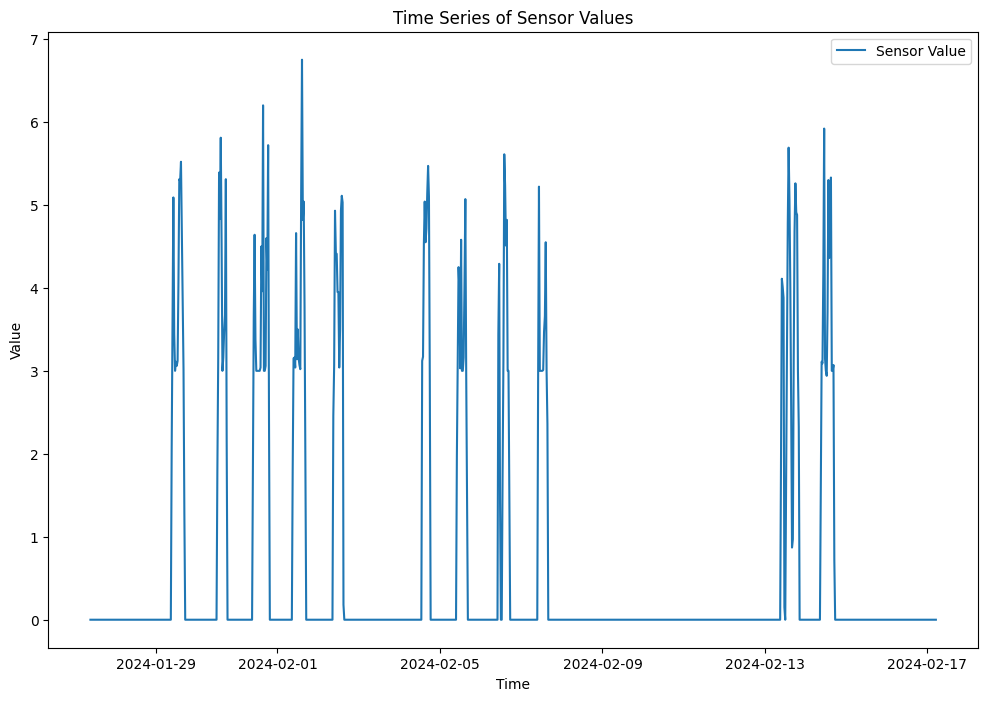

                 edit_time    A01_value   A01_status      A01_run  A01_rel
count                 1000  1000.000000  1000.000000  1000.000000   1000.0
mean   2024-02-06 19:15:00     0.586740     0.428000     0.899000      3.0
min    2024-01-27 09:30:00     0.000000     0.000000     0.000000      3.0
25%    2024-02-01 14:22:30     0.000000     0.000000     0.000000      3.0
50%    2024-02-06 19:15:00     0.000000     0.000000     0.000000      3.0
75%    2024-02-12 00:07:30     0.000000     0.000000     0.000000      3.0
max    2024-02-17 05:00:00     6.750000     4.000000     6.000000      3.0
std                    NaN     1.426016     1.237072     2.099811      0.0


In [ ]:
analyze_and_visualize_data(processed_data)